In [2]:
#importing libraries
import torch #It is core PyTorch library, used for tensor operations, creating models and performing computations on GPUs.
import torch.nn as nn # It Contains modules, layers, and functions to build neural networks (e.g., nn.Linear, nn.ReLU, etc.).
import torch.optim as optim #Provides optimization algorithms to update model parameters during training.
from torchvision import datasets, transforms
from torch.utils.data import DataLoader # A utility to handle data batching and shuffling during training and testing.


In [3]:
#Defining a CNN model
# The model i am defining here is a simple CNN
# Simple CNN is a straightforward convolutional neural network designed for image classification tasks, such as the MNIST dataset.
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [4]:
# preparing data
# we are giving MNIST data
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(), # Converts image data to PyTorch tensors and scales pixel values from [0, 255] to [0, 1].
    transforms.Normalize((0.5,), (0.5,))  # Normalize grayscale images
])

train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True) #torchvision.datasets.MNIST,downloads and loads the MNIST dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=True)  # DataLoader Splits the dataset into small batches of size 64 for training
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 50.4MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.01MB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.6MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.26MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
# Initialize Model, Loss, and Optimizer
model = SimpleCNN() # Instantiate the model, loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [8]:
# Training the model
epochs = 7 #epochs represent the number of times(7) the model sees the entire dataset during training.
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images) # Forward pass
        loss = criterion(outputs, labels)
         # Backward pass and optimization
        loss.backward()
        optimizer.step()
        #Calculate statistics
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.0159
Epoch 2, Loss: 0.0126
Epoch 3, Loss: 0.0102
Epoch 4, Loss: 0.0089
Epoch 5, Loss: 0.0078
Epoch 6, Loss: 0.0064
Epoch 7, Loss: 0.0064


In [9]:
# Evaluating the model
model.eval() # It is used  to inform PyTorch that the model is in evaluation mode.
correct = 0
total = 0
with torch.no_grad(): # It is used to turn off gradient calculations.
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")


Accuracy: 99.01%


Accuracy: 99.01%


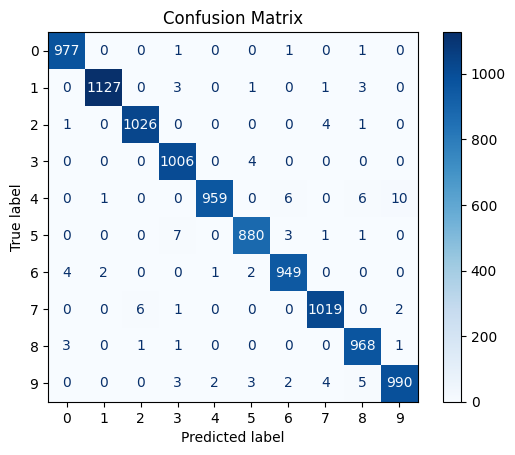

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch

# Switch model to evaluation mode
model.eval()
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store predictions and labels
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Print accuracy
print(f"Accuracy: {100 * correct / total:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))  # Adjust 'range(10)' for class labels
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
